In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Define the LeNet architecture
def LeNet():
    model = models.Sequential()
    # Convolutional layer with 6 filters, each of size 5x5, ReLU activation
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling layer with pool size 2x2
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Convolutional layer with 16 filters, each of size 5x5, ReLU activation
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
    # Max pooling layer with pool size 2x2
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Flatten layer to convert 2D output to 1D
    model.add(layers.Flatten())
    # Fully connected layer with 120 neurons, ReLU activation
    model.add(layers.Dense(120, activation='relu'))
    # Fully connected layer with 84 neurons, ReLU activation
    model.add(layers.Dense(84, activation='relu'))
    # Output layer with 10 neurons (one for each class), softmax activation
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [14]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize pixel values to between 0 and 1 and reshape for input to the LeNet model
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0


In [15]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [16]:
# Compile the model
model = LeNet()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.3252 - accuracy: 0.9064 - val_loss: 0.1088 - val_accuracy: 0.9679
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.0706 - val_accuracy: 0.9772
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0481 - val_accuracy: 0.9844
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0399 - val_accuracy: 0.9864
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0447 - val_accuracy: 0.9853
Epoch 

Training Loss: The training loss decreases steadily over epochs from 0.3252 to 0.0080.

Training Accuracy: The training accuracy increases steadily over epochs, reaching a final value of 0.9973.

Validation Loss: The validation loss decreases over epochs, indicating good performance on the validation set. It starts at 0.1088 and decreases to 0.0389.

Validation Accuracy: The validation accuracy increases over epochs, reaching a final value of 0.9909. This indicates that the model generalizes well to unseen data and performs accurately on the test dataset.

Overall, the model achieves high accuracy on both the training and validation datasets, suggesting that it effectively learns to classify handwritten digits from the MNIST dataset.

In [18]:
# Visualize some MNIST images and their predicted labels
num_images = 10
predictions = model.predict(test_images[:num_images])
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 80ms/step


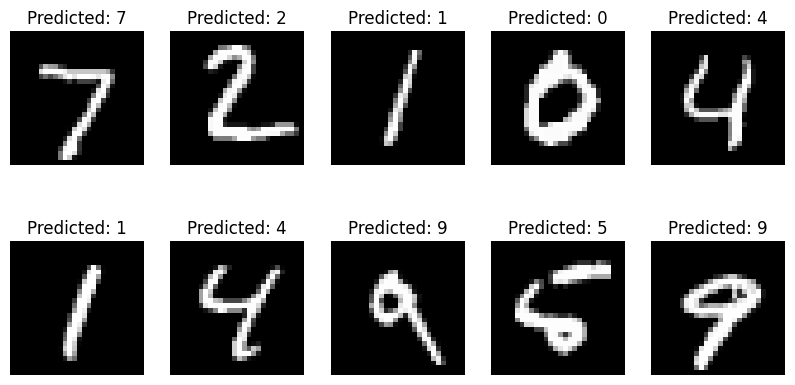

In [19]:
# Plotting the images and predicted labels
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()